## Mnist database

In [1]:
#LIbraries
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import save_model, load_model
import seaborn as sns

### 1. Load the MNSIT data set and split into training and test sets.

In [2]:
(ds_train1, ds_test1)= tfds.load('mnist', split=['train', 'test'], as_supervised=True)
print("Training size:", len(ds_train1))
print("Test size:", len(ds_test1))

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
Training size: 60000
Test size: 10000


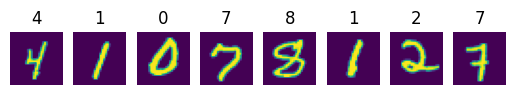

In [3]:
# Display some images. Specify how many images you want to see.
NumberOfImages = 8
fig, axes = plt.subplots(1, NumberOfImages)
for ax, (image, label) in zip(axes, ds_train1.take(NumberOfImages)):
    ax.imshow(image[:, :, 0])
    ax.set_title(label.numpy())
    ax.axis('off')

In [4]:
#Data normalization
ds_train = ds_train1.map(lambda image, label: (tf.cast(image, tf.float32) / 255., label)).batch(64)
ds_test = ds_test1.map(lambda image, label: (tf.cast(image, tf.float32) / 255., label)).batch(64)

In [5]:
NumberOfEpochs=4

### 2. Build a CNN with at least one convolutional layer and 2 or more hidden layers and a dense output layer for 10 classes.

In [6]:
modelCNN = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Flatten(), layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 64)                1179712   
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 1189930 (4.54 MB)
Trainable params: 1189930 (4.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________




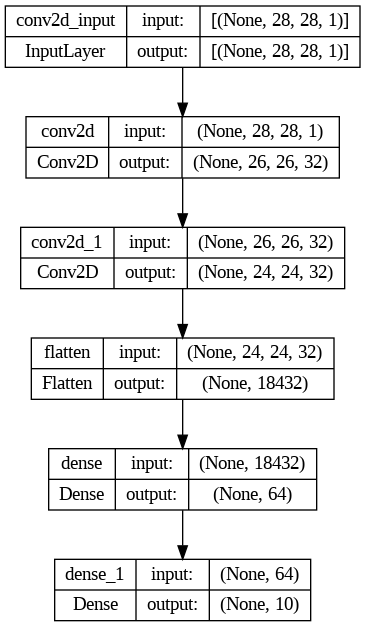

In [7]:
modelCNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelCNN.summary()
print('\n')
plot_model(modelCNN, show_shapes=True)

### 3. Train your CNN on the MNIST training set (extracted in step 1).

In [8]:
historyCNN = modelCNN.fit(ds_train, epochs=NumberOfEpochs, validation_data=ds_test)

Epoch 1/4
938/938 [==============================] - 14s 11ms/step - loss: 0.1375 - accuracy: 0.9583 - val_loss: 0.0574 - val_accuracy: 0.9812
Epoch 2/4
938/938 [==============================] - 5s 6ms/step - loss: 0.0414 - accuracy: 0.9881 - val_loss: 0.0554 - val_accuracy: 0.9835
Epoch 3/4
938/938 [==============================] - 5s 6ms/step - loss: 0.0240 - accuracy: 0.9925 - val_loss: 0.0560 - val_accuracy: 0.9842
Epoch 4/4
938/938 [==============================] - 6s 6ms/step - loss: 0.0148 - accuracy: 0.9951 - val_loss: 0.0481 - val_accuracy: 0.9867


### 4. Evaluate your trained model using the test data set. What is the accuracy of your model?

In [9]:
test_loss, test_accuracy = modelCNN.evaluate(ds_test)
print("Accuracy:", round(test_accuracy, 2), 'or', test_accuracy)

157/157 [==============================] - 1s 3ms/step - loss: 0.0481 - accuracy: 0.9867
Accuracy: 0.99 or 0.9866999983787537


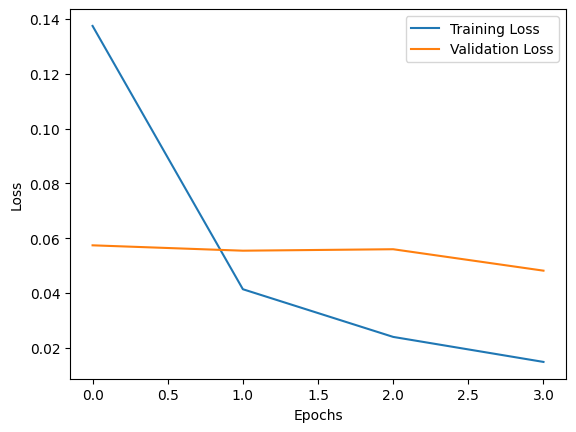

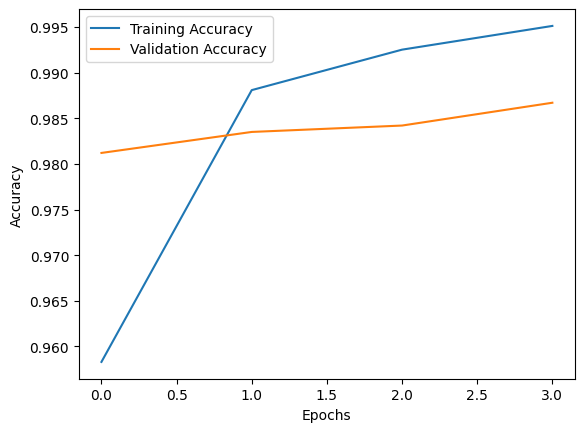

In [10]:
plt.plot(historyCNN.history['loss'], label='Training Loss')
plt.plot(historyCNN.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(historyCNN.history['accuracy'], label='Training Accuracy')
plt.plot(historyCNN.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

### 5. Do the following experiments to improve accuracy:
- increase the size and depth of the inner layers, what is the effect on the model accuracy?

In [11]:
results_dfSD = pd.DataFrame(columns=['Hidden Layers', 'Filter Size', 'Test Accuracy'])
layersSD = [3, 4]
filtersSD = [(3, 3), (5, 5)]

for layerSD in layersSD:
    for filter_size in filtersSD:
        modelSD = models.Sequential([layers.Conv2D(32, filter_size, activation='relu', input_shape=(28, 28, 1)),
            layers.Conv2D(32, filter_size, activation='relu'), layers.Flatten()])

        # Add hidden layer
        for _ in range(layerSD):
            modelSD.add(layers.Dense(128, activation='relu'))

        modelSD.add(layers.Dense(10, activation='softmax'))
        modelSD.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        print(f"\nModel with {layerSD} hidden layers and filter size {filter_size}:")
        historySD = modelSD.fit(ds_train, epochs=NumberOfEpochs, validation_data=ds_test, verbose=1)
        test_lossSD, test_accuracySD = modelSD.evaluate(ds_test)
        print(f'Test Loss: {test_lossSD}, Test Accuracy: {test_accuracySD}')

        dataSD = {'Hidden Layers': layerSD, 'Filter Size': filter_size, 'Test Accuracy': test_accuracySD}
        results_dfSD = pd.concat([results_dfSD, pd.DataFrame([dataSD])], ignore_index=True)


Model with 3 hidden layers and filter size (3, 3):
Epoch 1/4
938/938 [==============================] - 9s 8ms/step - loss: 0.1460 - accuracy: 0.9545 - val_loss: 0.0511 - val_accuracy: 0.9842
Epoch 2/4
938/938 [==============================] - 6s 6ms/step - loss: 0.0458 - accuracy: 0.9862 - val_loss: 0.0622 - val_accuracy: 0.9805
Epoch 3/4
938/938 [==============================] - 6s 7ms/step - loss: 0.0278 - accuracy: 0.9915 - val_loss: 0.0471 - val_accuracy: 0.9868
Epoch 4/4
157/157 [==============================] - 1s 3ms/step - loss: 0.0616 - accuracy: 0.9838
Test Loss: 0.0615542009472847, Test Accuracy: 0.9837999939918518

Model with 3 hidden layers and filter size (5, 5):
Epoch 1/4
938/938 [==============================] - 8s 6ms/step - loss: 0.1431 - accuracy: 0.9556 - val_loss: 0.0601 - val_accuracy: 0.9809
Epoch 2/4
938/938 [==============================] - 6s 7ms/step - loss: 0.0466 - accuracy: 0.9861 - val_loss: 0.0542 - val_accuracy: 0.9844
Epoch 3/4
938/938 [========

In [12]:
print(results_dfSD)

  Hidden Layers Filter Size  Test Accuracy
0             3      (3, 3)         0.9838
1             3      (5, 5)         0.9846
2             4      (3, 3)         0.9852
3             4      (5, 5)         0.9810


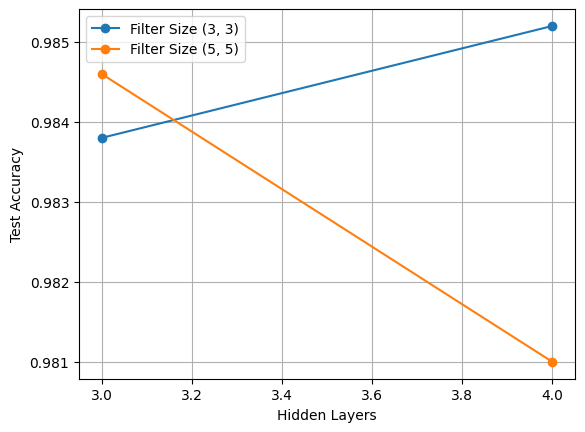

In [13]:
for filter_size, group_df in results_dfSD.groupby('Filter Size'):
    label = f"Filter Size {filter_size}"
    plt.plot(group_df['Hidden Layers'], group_df['Test Accuracy'], label=label, marker='o', linestyle='-')

plt.xlabel('Hidden Layers')
plt.ylabel('Test Accuracy')
plt.legend()
plt.grid(True)

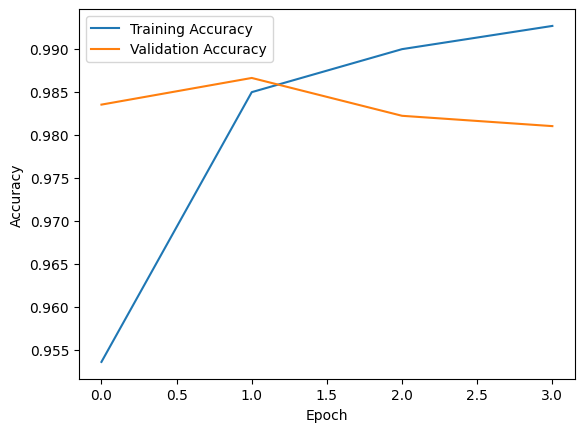

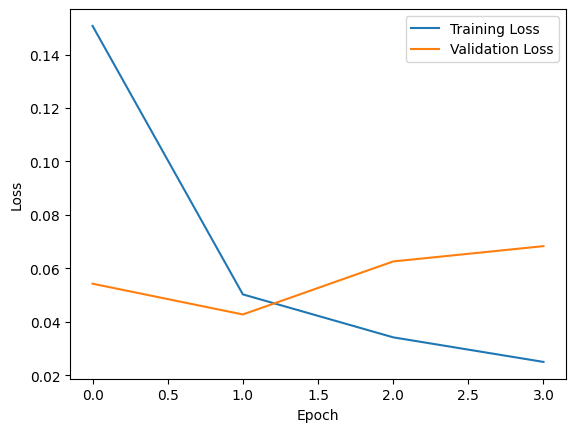

In [14]:
plt.plot(historySD.history['accuracy'], label='Training Accuracy')
plt.plot(historySD.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(historySD.history['loss'], label='Training Loss')
plt.plot(historySD.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

- experiment with different activation functions in the inner layers (relu, sigmoid, softmask, etc), see the list of keras activation functions at https://keras.io/api/layers/activations/

In [15]:
results_dfA = pd.DataFrame(columns=['Activation Function', 'Test Accuracy'])
activations = ['relu', 'sigmoid', 'softmax', 'tanh', 'softplus', 'leaky_relu']

for activation in activations:
    print(f"\nActivation function: {activation}")

    modelA = models.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)),
        layers.Activation(activation), layers.Conv2D(32, kernel_size=(3, 3)),
        layers.Activation(activation), layers.Flatten(),
        layers.Dense(64, activation=activation), layers.Dense(10, activation='softmax')])

    modelA.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    historyA = modelA.fit(ds_train, epochs=NumberOfEpochs, validation_data=ds_test)
    test_lossA, test_accuracyA = modelA.evaluate(ds_test)
    print(f'Test Loss: {test_lossA}, Test Accuracy: {test_accuracyA}')

    dataA = {'Activation Function': activation, 'Test Accuracy': test_accuracyA}
    results_dfA = pd.concat([results_dfA, pd.DataFrame([dataA])], ignore_index=True)


Activation function: relu
Epoch 1/4
938/938 [==============================] - 7s 6ms/step - loss: 0.1419 - accuracy: 0.9563 - val_loss: 0.0565 - val_accuracy: 0.9812
Epoch 2/4
938/938 [==============================] - 6s 7ms/step - loss: 0.0427 - accuracy: 0.9867 - val_loss: 0.0500 - val_accuracy: 0.9850
Epoch 3/4
938/938 [==============================] - 6s 6ms/step - loss: 0.0250 - accuracy: 0.9919 - val_loss: 0.0455 - val_accuracy: 0.9860
Epoch 4/4
157/157 [==============================] - 1s 6ms/step - loss: 0.0496 - accuracy: 0.9859
Test Loss: 0.04959998279809952, Test Accuracy: 0.9858999848365784

Activation function: sigmoid
Epoch 1/4
938/938 [==============================] - 8s 7ms/step - loss: 2.3225 - accuracy: 0.1088 - val_loss: 2.3024 - val_accuracy: 0.1135
Epoch 2/4
938/938 [==============================] - 6s 7ms/step - loss: 2.3041 - accuracy: 0.1086 - val_loss: 2.3024 - val_accuracy: 0.1135
Epoch 3/4
938/938 [==============================] - 5s 6ms/step - loss: 

In [16]:
print(results_dfA)

  Activation Function  Test Accuracy
0                relu         0.9859
1             sigmoid         0.1135
2             softmax         0.3158
3                tanh         0.9709
4            softplus         0.9710
5          leaky_relu         0.9858


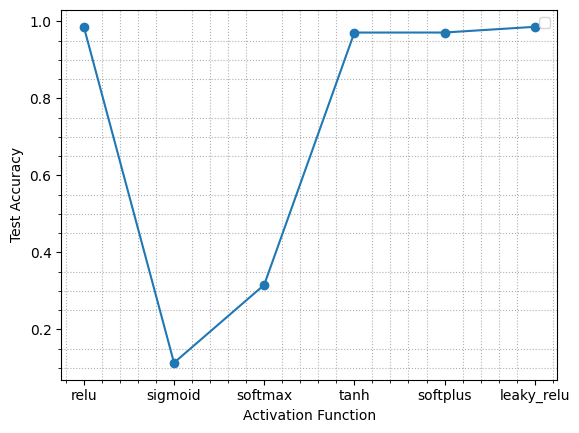

In [17]:
plt.plot(results_dfA['Activation Function'], results_dfA['Test Accuracy'], marker='o', linestyle='-')
plt.xlabel('Activation Function')
plt.ylabel('Test Accuracy')
plt.legend()
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':')

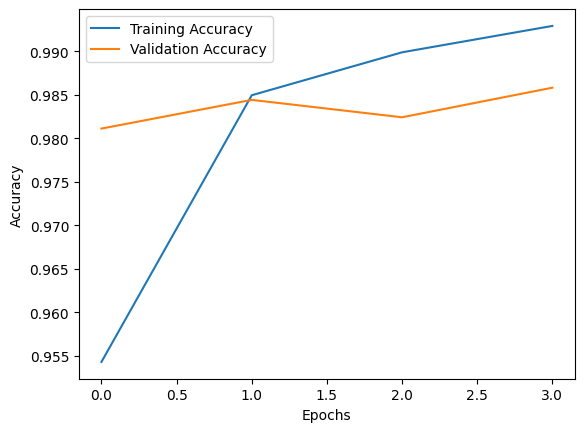

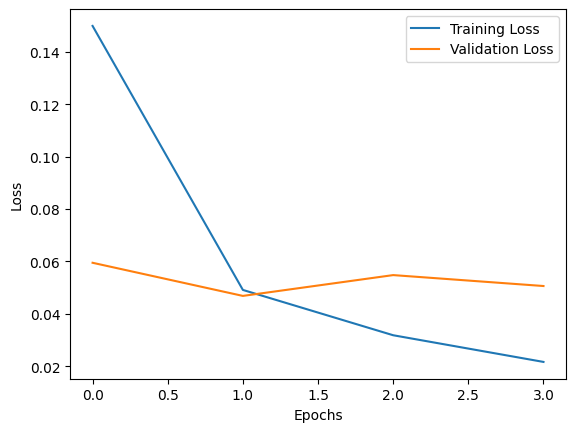

In [18]:
plt.plot(historyA.history['accuracy'], label='Training Accuracy')
plt.plot(historyA.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(historyA.history['loss'], label='Training Loss')
plt.plot(historyA.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

- what is the effect of using different activation functions? how about combining the activation function choice with different network size and depth?

In [19]:
#We remove sigmoid and softmax as their accuracies was not acceptible.
#tanh and softplus are also excluded as they have lower accuracies than other two activation methods.
results_dfAC = pd.DataFrame(columns=['Activation Function', 'Network Size', 'Depth', 'Test Accuracy'])
activationsAC = ['relu', 'leaky_relu']
sizesAC = [32, 128]
depthsAC = [1, 3]

for activation in activationsAC:
    for size in sizesAC:
        for depth in depthsAC:
            print(f"\nActivation function: {activation}, Size: {size}, Depth: {depth}")

            layers_list = [
                layers.Conv2D(size, kernel_size=(3, 3), input_shape=(28, 28, 1)), layers.Activation(activation)]

            for _ in range(depth - 1):
                layers_list.extend([layers.Conv2D(size, kernel_size=(3, 3)), layers.Activation(activation)])

            layers_list.extend([
                layers.Flatten(), layers.Dense(size * 2, activation=activation),
                layers.Dense(10, activation='softmax')])

            modelAC = models.Sequential(layers_list)
            modelAC.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            historyAC = modelAC.fit(ds_train, epochs=NumberOfEpochs, validation_data=ds_test)
            test_loss, test_accuracy = modelAC.evaluate(ds_test)
            print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
            dataAC = {'Activation Function': activation, 'Network Size': size, 'Depth': depth, 'Test Accuracy': test_accuracy}
            results_dfAC = pd.concat([results_dfAC, pd.DataFrame([dataAC])], ignore_index=True)


Activation function: relu, Size: 32, Depth: 1
Epoch 1/4
938/938 [==============================] - 6s 5ms/step - loss: 0.1697 - accuracy: 0.9496 - val_loss: 0.0693 - val_accuracy: 0.9774
Epoch 2/4
938/938 [==============================] - 6s 7ms/step - loss: 0.0522 - accuracy: 0.9847 - val_loss: 0.0653 - val_accuracy: 0.9780
Epoch 3/4
938/938 [==============================] - 5s 5ms/step - loss: 0.0307 - accuracy: 0.9911 - val_loss: 0.0655 - val_accuracy: 0.9801
Epoch 4/4
157/157 [==============================] - 1s 4ms/step - loss: 0.0685 - accuracy: 0.9805
Test Loss: 0.06852028518915176, Test Accuracy: 0.9804999828338623

Activation function: relu, Size: 32, Depth: 3
Epoch 1/4
938/938 [==============================] - 8s 7ms/step - loss: 0.1279 - accuracy: 0.9614 - val_loss: 0.0523 - val_accuracy: 0.9844
Epoch 2/4
938/938 [==============================] - 7s 7ms/step - loss: 0.0405 - accuracy: 0.9879 - val_loss: 0.0382 - val_accuracy: 0.9880
Epoch 3/4
938/938 [=================

In [20]:
print(results_dfAC)

  Activation Function Network Size Depth  Test Accuracy
0                relu           32     1         0.9805
1                relu           32     3         0.9891
2                relu          128     1         0.9827
3                relu          128     3         0.9892
4          leaky_relu           32     1         0.9755
5          leaky_relu           32     3         0.9867
6          leaky_relu          128     1         0.9730
7          leaky_relu          128     3         0.9740


<ipython-input-21-da8e5f5dde55>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=results_dfAC, x='Network Size', y='Test Accuracy', hue='Activation Function', ci=None)


<Axes: xlabel='Network Size', ylabel='Test Accuracy'>

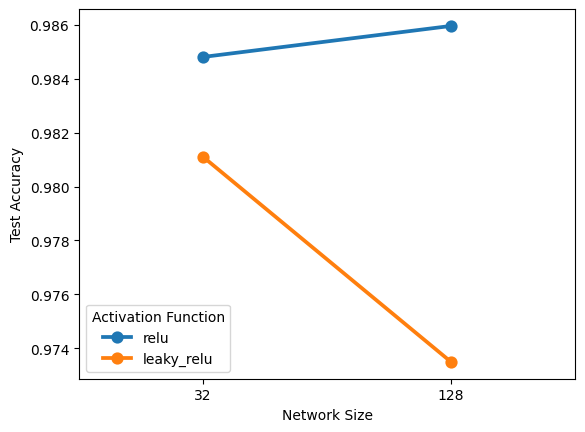

In [21]:
sns.pointplot(data=results_dfAC, x='Network Size', y='Test Accuracy', hue='Activation Function', ci=None)

<ipython-input-22-1557ea499cb8>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=results_dfAC, x='Depth', y='Test Accuracy', hue='Activation Function', ci=None)


<Axes: xlabel='Depth', ylabel='Test Accuracy'>

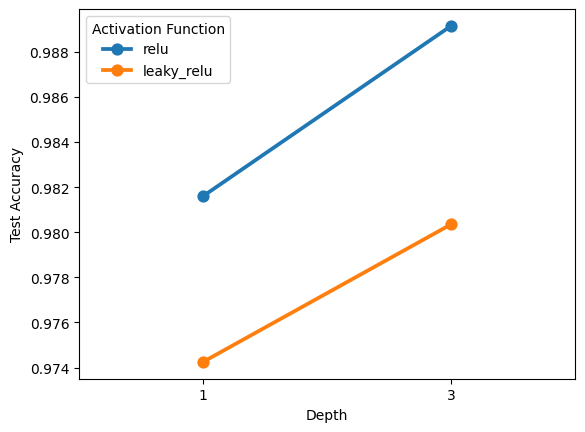

In [22]:
sns.pointplot(data=results_dfAC, x='Depth', y='Test Accuracy', hue='Activation Function', ci=None)

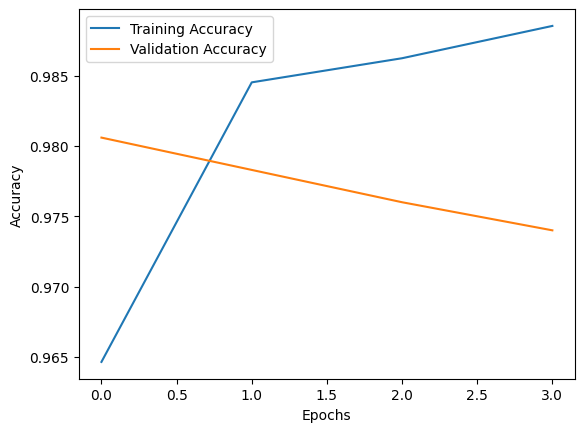

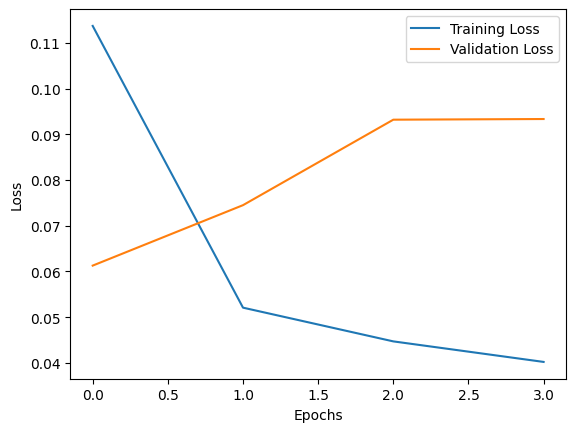

In [23]:
plt.plot(historyAC.history['accuracy'], label='Training Accuracy')
plt.plot(historyAC.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(historyAC.history['loss'], label='Training Loss')
plt.plot(historyAC.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

The choice of activation functions can significantly impact the performance of your neural network. Let's analyze the results you've obtained with different activation functions:

Sigmoid Activation:

Training Accuracy: ~10%
Test Accuracy: ~10%
Sigmoid might not be suitable for deeper networks or convolutional layers due to the vanishing gradient problem.
Softmax Activation:

Training Accuracy: ~21%
Test Accuracy: ~21%
Using softmax in the hidden layers might not be suitable as it tends to squash input values, and using it in convolutional layers is not common.
Softplus Activation:

Training Accuracy: ~11%
Test Accuracy: ~11%
Softplus might not be well-suited for convolutional layers in this context.
Tanh Activation:

Training Accuracy: ~95%
Test Accuracy: ~96%
Tanh performs well in this context, capturing a good representation of the data.
In summary, for convolutional layers in image classification tasks, commonly used activation functions like ReLU or variants (e.g., Leaky ReLU) are preferred. Sigmoid, Softmax, and Softplus activations are generally not suitable for hidden layers in convolutional neural networks (CNNs). Tanh can be a good choice, but ReLU is often preferred due to its simplicity and effectiveness.

You may want to experiment further with ReLU or Leaky ReLU activations for the convolutional and dense layers.

- experiment with various optimizers (https://keras.io/api/optimizers/) and learning rate. What is the effect on the resulting model accuracy?

In [24]:
results_dfO = pd.DataFrame(columns=['Optimizer', 'Learning Rate', 'Activation', 'Test Accuracy'])
learning_ratesO = [0.01, 0.1]
activationsO = ['relu', 'leaky_relu']

for learning_rate in learning_ratesO:
    for activation in activationsO:
        print(f"\nOptimizer: Adam, Learning Rate: {learning_rate}, Activation: {activation}")

        modelO = models.Sequential([
            layers.Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)),
            layers.Activation(activation),
            layers.Conv2D(32, kernel_size=(3, 3)),
            layers.Activation(activation), layers.Flatten(),
            layers.Dense(64, activation=activation),
            layers.Dense(10, activation='softmax')])

        optimizer_config = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        modelO.compile(optimizer=optimizer_config,
                      loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        historyO = modelO.fit(ds_train, epochs=NumberOfEpochs, validation_data=ds_test)
        test_loss, test_accuracy = modelO.evaluate(ds_test)
        print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
        dataO = {'Optimizer': 'Adam', 'Learning Rate': learning_rate, 'Activation': activation, 'Test Accuracy': test_accuracy}
        results_dfO = pd.concat([results_dfO, pd.DataFrame([dataO])], ignore_index=True)


Optimizer: Adam, Learning Rate: 0.01, Activation: relu
Epoch 1/4
938/938 [==============================] - 7s 7ms/step - loss: 0.1506 - accuracy: 0.9542 - val_loss: 0.0803 - val_accuracy: 0.9728
Epoch 2/4
938/938 [==============================] - 5s 6ms/step - loss: 0.0677 - accuracy: 0.9797 - val_loss: 0.0799 - val_accuracy: 0.9751
Epoch 3/4
938/938 [==============================] - 6s 7ms/step - loss: 0.0573 - accuracy: 0.9828 - val_loss: 0.0995 - val_accuracy: 0.9741
Epoch 4/4
157/157 [==============================] - 1s 5ms/step - loss: 0.1029 - accuracy: 0.9732
Test Loss: 0.10292389988899231, Test Accuracy: 0.9732000231742859

Optimizer: Adam, Learning Rate: 0.01, Activation: leaky_relu
Epoch 1/4
938/938 [==============================] - 7s 6ms/step - loss: 0.2222 - accuracy: 0.9374 - val_loss: 0.1420 - val_accuracy: 0.9609
Epoch 2/4
938/938 [==============================] - 6s 7ms/step - loss: 0.9824 - accuracy: 0.9432 - val_loss: 0.1467 - val_accuracy: 0.9668
Epoch 3/4
93

In [25]:
learning_ratesO = [0.01, 0.1]
activationsO = ['relu', 'leaky_relu']

for learning_rate in learning_ratesO:
    for activation in activationsO:
        print(f"\nOptimizer: SGD, Learning Rate: {learning_rate}, Activation: {activation}")

        modelO = models.Sequential([
            layers.Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)),
            layers.Activation(activation),
            layers.Conv2D(32, kernel_size=(3, 3)),
            layers.Activation(activation), layers.Flatten(),
            layers.Dense(64, activation=activation),
            layers.Dense(10, activation='softmax')])

        optimizer_config = tf.keras.optimizers.SGD(learning_rate=learning_rate)
        modelO.compile(optimizer=optimizer_config,
                      loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        historyO = modelO.fit(ds_train, epochs=NumberOfEpochs, validation_data=ds_test)
        test_loss, test_accuracy = modelO.evaluate(ds_test)
        print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
        dataO = {'Optimizer': 'SGD', 'Learning Rate': learning_rate, 'Activation': activation, 'Test Accuracy': test_accuracy}
        results_dfO = pd.concat([results_dfO, pd.DataFrame([dataO])], ignore_index=True)


Optimizer: SGD, Learning Rate: 0.01, Activation: relu
Epoch 1/4
938/938 [==============================] - 7s 7ms/step - loss: 0.4388 - accuracy: 0.8770 - val_loss: 0.2314 - val_accuracy: 0.9307
Epoch 2/4
938/938 [==============================] - 5s 6ms/step - loss: 0.1954 - accuracy: 0.9417 - val_loss: 0.1561 - val_accuracy: 0.9534
Epoch 3/4
938/938 [==============================] - 5s 5ms/step - loss: 0.1481 - accuracy: 0.9561 - val_loss: 0.1255 - val_accuracy: 0.9637
Epoch 4/4
157/157 [==============================] - 1s 4ms/step - loss: 0.1127 - accuracy: 0.9672
Test Loss: 0.11272308230400085, Test Accuracy: 0.967199981212616

Optimizer: SGD, Learning Rate: 0.01, Activation: leaky_relu
Epoch 1/4
938/938 [==============================] - 6s 6ms/step - loss: 0.4763 - accuracy: 0.8622 - val_loss: 0.2693 - val_accuracy: 0.9172
Epoch 2/4
938/938 [==============================] - 6s 6ms/step - loss: 0.2351 - accuracy: 0.9308 - val_loss: 0.1940 - val_accuracy: 0.9400
Epoch 3/4
938/9

In [26]:
learning_ratesO = [0.01, 0.1]
activationsO = ['relu', 'leaky_relu']

for learning_rate in learning_ratesO:
    for activation in activationsO:
        print(f"\nOptimizer: RMSprop, Learning Rate: {learning_rate}, Activation: {activation}")

        modelO = models.Sequential([
            layers.Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)),
            layers.Activation(activation),
            layers.Conv2D(32, kernel_size=(3, 3)),
            layers.Activation(activation), layers.Flatten(),
            layers.Dense(64, activation=activation),
            layers.Dense(10, activation='softmax')])

        optimizer_config = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
        modelO.compile(optimizer=optimizer_config,
                      loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        historyO = modelO.fit(ds_train, epochs=NumberOfEpochs, validation_data=ds_test)
        test_loss, test_accuracy = modelO.evaluate(ds_test)
        print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
        dataO = {'Optimizer': 'RMSprop', 'Learning Rate': learning_rate, 'Activation': activation, 'Test Accuracy': test_accuracy}
        results_dfO = pd.concat([results_dfO, pd.DataFrame([dataO])], ignore_index=True)


Optimizer: RMSprop, Learning Rate: 0.01, Activation: relu
Epoch 1/4
938/938 [==============================] - 7s 7ms/step - loss: 0.1944 - accuracy: 0.9450 - val_loss: 0.0570 - val_accuracy: 0.9819
Epoch 2/4
938/938 [==============================] - 5s 6ms/step - loss: 0.0620 - accuracy: 0.9829 - val_loss: 0.0893 - val_accuracy: 0.9802
Epoch 3/4
938/938 [==============================] - 5s 6ms/step - loss: 0.0422 - accuracy: 0.9890 - val_loss: 0.0796 - val_accuracy: 0.9827
Epoch 4/4
157/157 [==============================] - 1s 3ms/step - loss: 0.0980 - accuracy: 0.9835
Test Loss: 0.0980314090847969, Test Accuracy: 0.9835000038146973

Optimizer: RMSprop, Learning Rate: 0.01, Activation: leaky_relu
Epoch 1/4
938/938 [==============================] - 6s 6ms/step - loss: 1.0059 - accuracy: 0.9003 - val_loss: 0.1482 - val_accuracy: 0.9602
Epoch 2/4
938/938 [==============================] - 6s 6ms/step - loss: 0.2477 - accuracy: 0.9551 - val_loss: 0.3820 - val_accuracy: 0.9472
Epoch 3

In [27]:
print(results_dfO)

   Optimizer  Learning Rate  Activation  Test Accuracy
0       Adam           0.01        relu         0.9732
1       Adam           0.01  leaky_relu         0.9720
2       Adam           0.10        relu         0.1135
3       Adam           0.10  leaky_relu         0.8994
4        SGD           0.01        relu         0.9672
5        SGD           0.01  leaky_relu         0.9613
6        SGD           0.10        relu         0.9838
7        SGD           0.10  leaky_relu         0.9829
8    RMSprop           0.01        relu         0.9835
9    RMSprop           0.01  leaky_relu         0.9706
10   RMSprop           0.10        relu         0.1135
11   RMSprop           0.10  leaky_relu         0.8636


<ipython-input-28-2661b4f50eb3>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=results_dfO, x='Optimizer', y='Test Accuracy', hue='Activation', ci=None)


<Axes: xlabel='Optimizer', ylabel='Test Accuracy'>

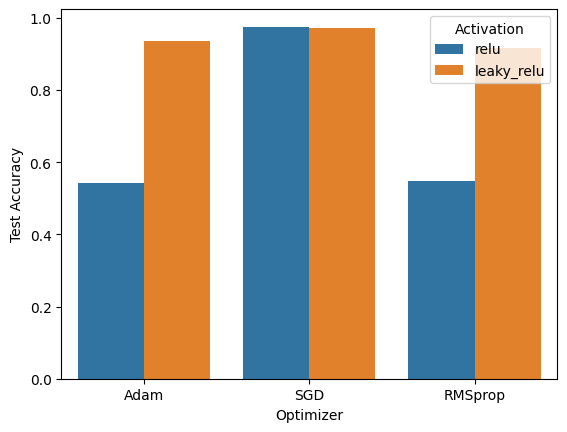

In [28]:
sns.barplot(data=results_dfO, x='Optimizer', y='Test Accuracy', hue='Activation', ci=None)

<ipython-input-29-871c335df4fa>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=results_dfO, x='Optimizer', y='Test Accuracy', hue='Activation', ci=None)


<Axes: xlabel='Optimizer', ylabel='Test Accuracy'>

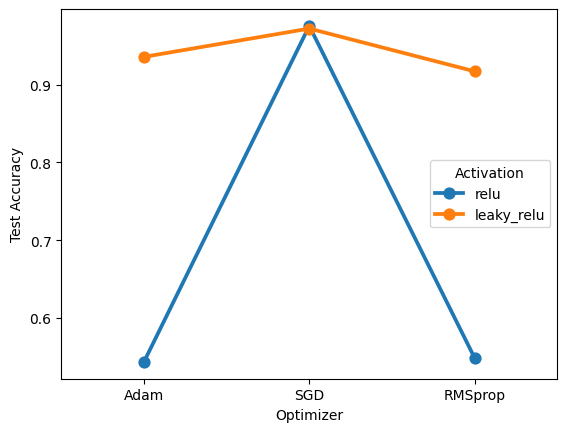

In [29]:
sns.pointplot(data=results_dfO, x='Optimizer', y='Test Accuracy', hue='Activation', ci=None)

<ipython-input-30-e70a2448622a>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=results_dfO, x='Optimizer', y='Test Accuracy', hue='Learning Rate', ci=None)


<Axes: xlabel='Optimizer', ylabel='Test Accuracy'>

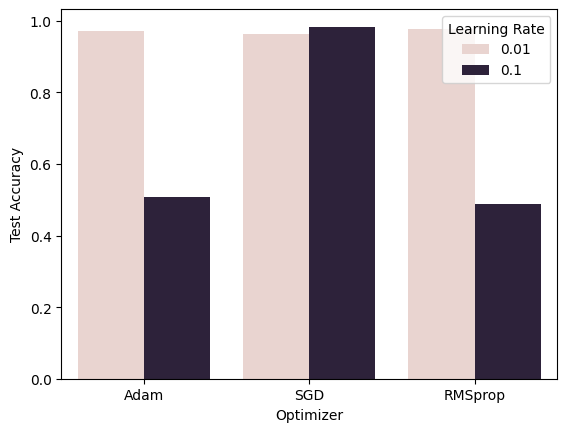

In [30]:
sns.barplot(data=results_dfO, x='Optimizer', y='Test Accuracy', hue='Learning Rate', ci=None)

<ipython-input-31-498ba5cf7c60>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=results_dfO, x='Optimizer', y='Test Accuracy', hue='Learning Rate', ci=None)


<Axes: xlabel='Optimizer', ylabel='Test Accuracy'>

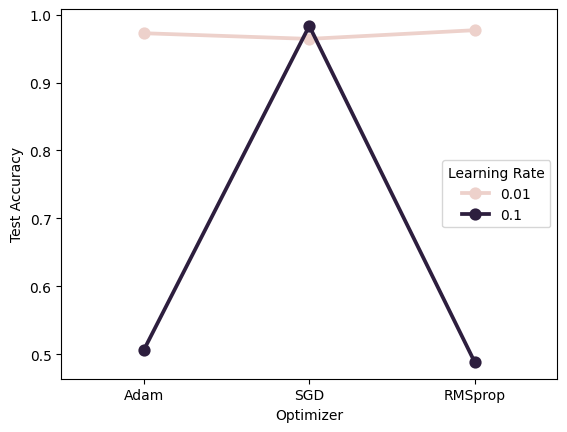

In [31]:
sns.pointplot(data=results_dfO, x='Optimizer', y='Test Accuracy', hue='Learning Rate', ci=None)

<ipython-input-32-dba1aae73975>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=results_dfO, x='Activation', y='Test Accuracy', hue='Learning Rate', ci=None)


<Axes: xlabel='Activation', ylabel='Test Accuracy'>

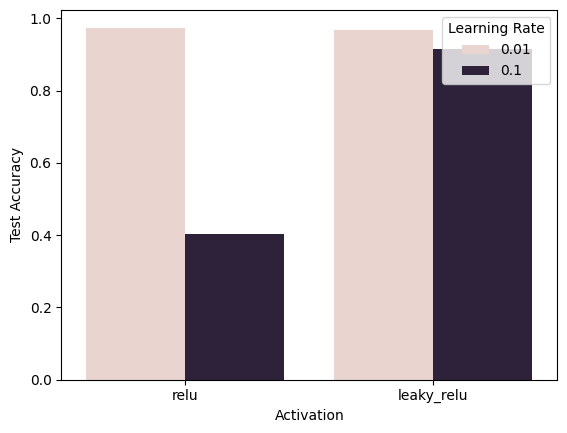

In [32]:
sns.barplot(data=results_dfO, x='Activation', y='Test Accuracy', hue='Learning Rate', ci=None)

<ipython-input-33-191aedc49e23>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=results_dfO, x='Activation', y='Test Accuracy', hue='Learning Rate', ci=None)


<Axes: xlabel='Activation', ylabel='Test Accuracy'>

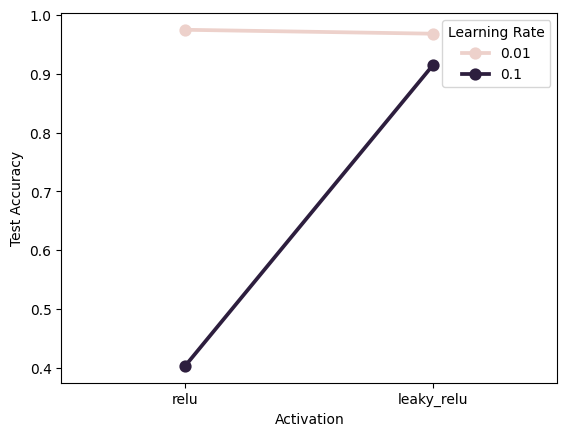

In [33]:
sns.pointplot(data=results_dfO, x='Activation', y='Test Accuracy', hue='Learning Rate', ci=None)

- with all the above variations, experiment with various batch sizes and epochs for training (see https://keras.io/api/models/model_training_apis/)

In [34]:
results_dfBE = pd.DataFrame(columns=['Batch Size', 'Epochs', 'Test Accuracy'])
batch_sizes = [16, 64]
epochs_list = [2, 5]

for batch_size in batch_sizes:
    for epochs in epochs_list:
        print(f"\nBatch size {batch_size} and epochs {epochs}")

        modelBE = models.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            layers.Conv2D(32, (3, 3), activation='relu'),
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')])

        modelBE.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        historyBE = modelBE.fit(ds_train, batch_size=batch_size, epochs=epochs, validation_data=ds_test)
        test_loss, test_accuracy = modelBE.evaluate(ds_test)
        print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
        dataBE = {'Batch Size': batch_size, 'Epochs': epochs, 'Test Accuracy': test_accuracy}
        results_dfBE = pd.concat([results_dfBE, pd.DataFrame([dataBE])], ignore_index=True)


Batch size 16 and epochs 2
Epoch 1/2
938/938 [==============================] - 8s 7ms/step - loss: 0.1332 - accuracy: 0.9585 - val_loss: 0.0560 - val_accuracy: 0.9815
Epoch 2/2
157/157 [==============================] - 1s 3ms/step - loss: 0.0488 - accuracy: 0.9845
Test Loss: 0.04880281537771225, Test Accuracy: 0.984499990940094

Batch size 16 and epochs 5
Epoch 1/5
938/938 [==============================] - 7s 7ms/step - loss: 0.1422 - accuracy: 0.9564 - val_loss: 0.0569 - val_accuracy: 0.9823
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0433 - accuracy: 0.9873 - val_loss: 0.0507 - val_accuracy: 0.9840
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0264 - accuracy: 0.9920 - val_loss: 0.0541 - val_accuracy: 0.9845
Epoch 4/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 0.0638 - val_accuracy: 0.9836
Epoch 5/5
157/157 [==============================] - 1s 3ms/step - loss: 0.

In [35]:
print(results_dfBE)

  Batch Size Epochs  Test Accuracy
0         16      2         0.9845
1         16      5         0.9870
2         64      2         0.9851
3         64      5         0.9838


<ipython-input-36-74bafe5591d3>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=results_dfBE, x='Epochs', y='Test Accuracy', hue='Batch Size', ci=None)


<Axes: xlabel='Epochs', ylabel='Test Accuracy'>

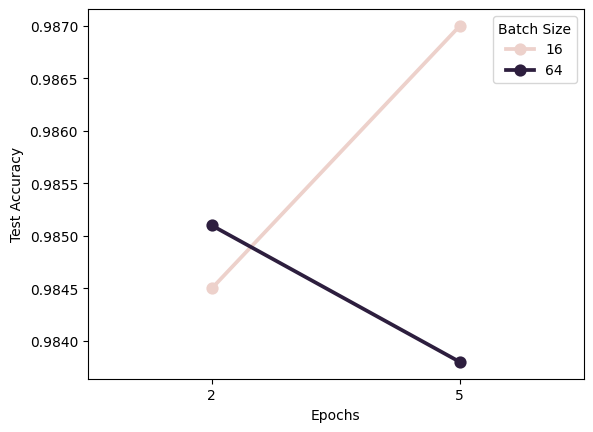

In [36]:
sns.pointplot(data=results_dfBE, x='Epochs', y='Test Accuracy', hue='Batch Size', ci=None)

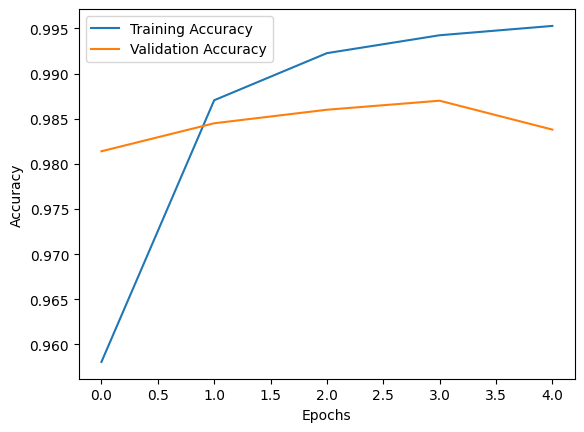

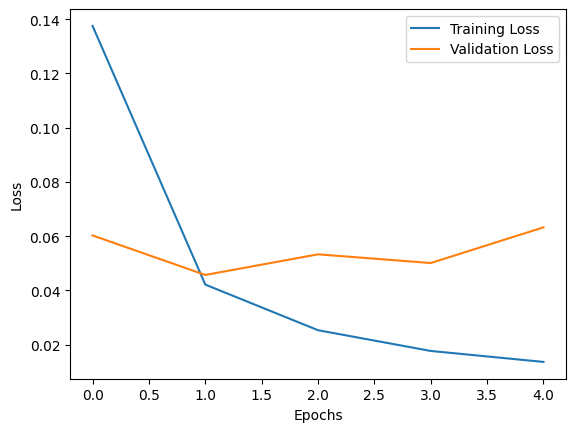

In [37]:
plt.plot(historyBE.history['accuracy'], label='Training Accuracy')
plt.plot(historyBE.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(historyBE.history['loss'], label='Training Loss')
plt.plot(historyBE.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

- what happens if we don't use any CNN layer? (considering the model in https://www.tensorflow.org/datasets/keras_example).

In [38]:
results_dfNoCNN = pd.DataFrame(columns=['Dense Layer Size', 'Batch Size', 'Epochs', 'Test Accuracy'])
modelNoCNN = models.Sequential([layers.Flatten(input_shape=(28, 28, 1)),
                                layers.Dense(64, activation='relu'), layers.Dense(10, activation='softmax')])

dense_sizes = [64, 128]
for dense_size in dense_sizes:
    modelNoCNN.layers[1].units = dense_size
    modelNoCNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    for batch_size in [32, 64]:
        for epochs in [2, 4]:
            print(f"\n\nDense Layer: {dense_size}, Batch Size: {batch_size}, Epochs: {epochs}")
            historyNoCNN = modelNoCNN.fit(ds_train, batch_size=batch_size, epochs=epochs, validation_data=ds_test)
            test_loss, test_accuracy = modelNoCNN.evaluate(ds_test)
            print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

            dataNoCNN = {'Dense Layer Size': dense_size, 'Batch Size': batch_size, 'Epochs': epochs,
                         'Test Accuracy': test_accuracy}
            results_dfNoCNN = pd.concat([results_dfNoCNN, pd.DataFrame([dataNoCNN])], ignore_index=True)



Dense Layer: 64, Batch Size: 32, Epochs: 2
Epoch 1/2
938/938 [==============================] - 5s 5ms/step - loss: 0.3576 - accuracy: 0.9003 - val_loss: 0.1966 - val_accuracy: 0.9423
Epoch 2/2
157/157 [==============================] - 0s 3ms/step - loss: 0.1407 - accuracy: 0.9581
Test Loss: 0.14067067205905914, Test Accuracy: 0.9581000208854675


Dense Layer: 64, Batch Size: 32, Epochs: 4
Epoch 1/4
938/938 [==============================] - 4s 4ms/step - loss: 0.1253 - accuracy: 0.9648 - val_loss: 0.1186 - val_accuracy: 0.9637
Epoch 2/4
938/938 [==============================] - 5s 5ms/step - loss: 0.1000 - accuracy: 0.9716 - val_loss: 0.1056 - val_accuracy: 0.9683
Epoch 3/4
938/938 [==============================] - 4s 4ms/step - loss: 0.0833 - accuracy: 0.9766 - val_loss: 0.0969 - val_accuracy: 0.9698
Epoch 4/4
157/157 [==============================] - 1s 3ms/step - loss: 0.0908 - accuracy: 0.9724
Test Loss: 0.09077922999858856, Test Accuracy: 0.9724000096321106


Dense Layer: 6

In [39]:
print(results_dfNoCNN)

  Dense Layer Size Batch Size Epochs  Test Accuracy
0               64         32      2         0.9581
1               64         32      4         0.9724
2               64         64      2         0.9737
3               64         64      4         0.9745
4              128         32      2         0.9739
5              128         32      4         0.9725
6              128         64      2         0.9723
7              128         64      4         0.9719


<ipython-input-40-a5b74aad35a9>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=results_dfNoCNN, x='Dense Layer Size', y='Test Accuracy', hue='Batch Size', ci=None)


<Axes: xlabel='Dense Layer Size', ylabel='Test Accuracy'>

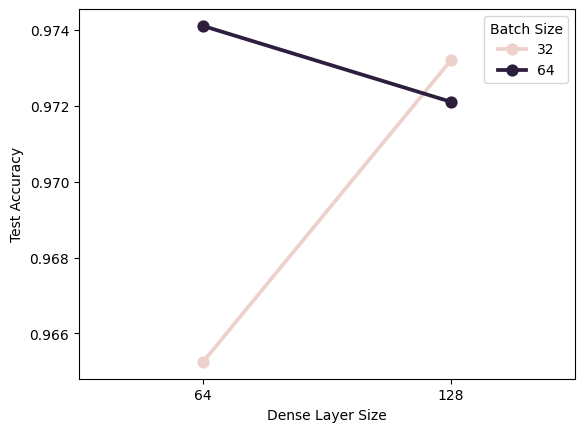

In [40]:
sns.pointplot(data=results_dfNoCNN, x='Dense Layer Size', y='Test Accuracy', hue='Batch Size', ci=None)

<ipython-input-41-b74dd8a4358a>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=results_dfNoCNN, x='Dense Layer Size', y='Test Accuracy', hue='Epochs', ci=None)


<Axes: xlabel='Dense Layer Size', ylabel='Test Accuracy'>

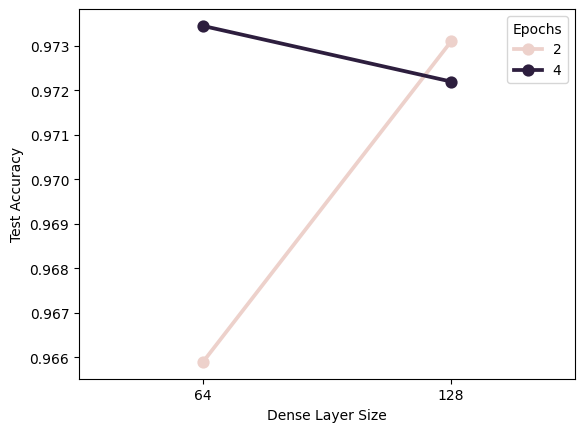

In [41]:
sns.pointplot(data=results_dfNoCNN, x='Dense Layer Size', y='Test Accuracy', hue='Epochs', ci=None)

If you don't use any CNN layers and rely solely on dense layers for image classification tasks, your model might struggle to capture spatial hierarchies and local patterns present in images. CNNs are specifically designed to handle grid-like data, like images, by using convolutional and pooling layers to learn hierarchical features.

Without CNN layers, the model might treat each pixel as an independent feature, not considering the spatial relationships between pixels. This can result in a significantly larger number of parameters, making the training process slower and more prone to overfitting. Additionally, the model might not generalize well to new, unseen images.

In summary, while a model without CNN layers might work for simple tasks or datasets, it's generally less effective for image-related tasks compared to models that leverage convolutional layers.

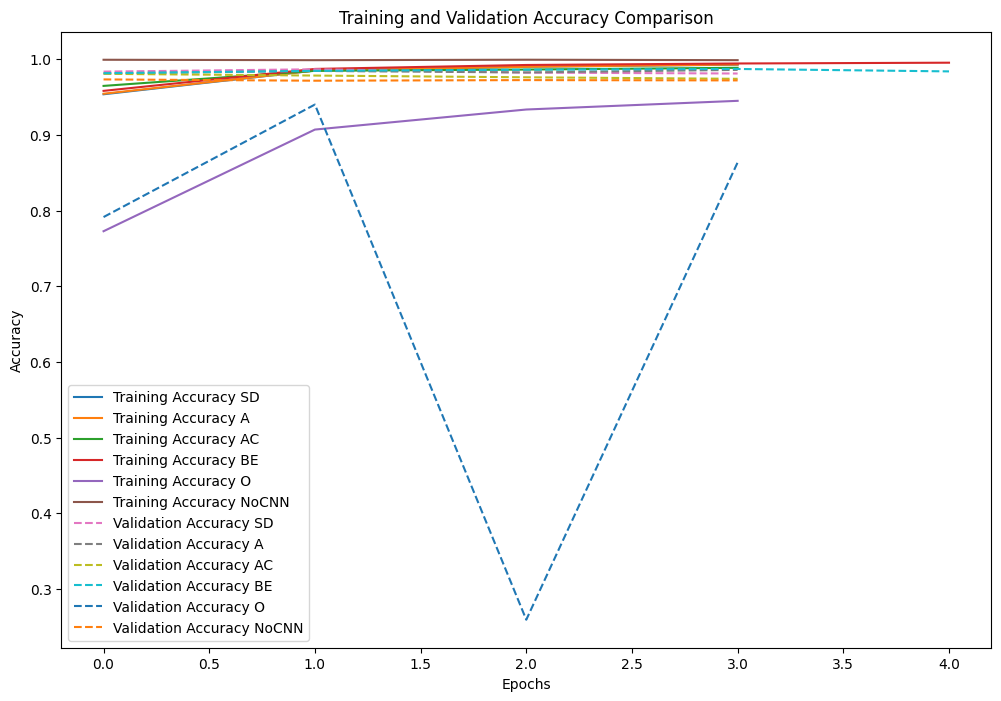

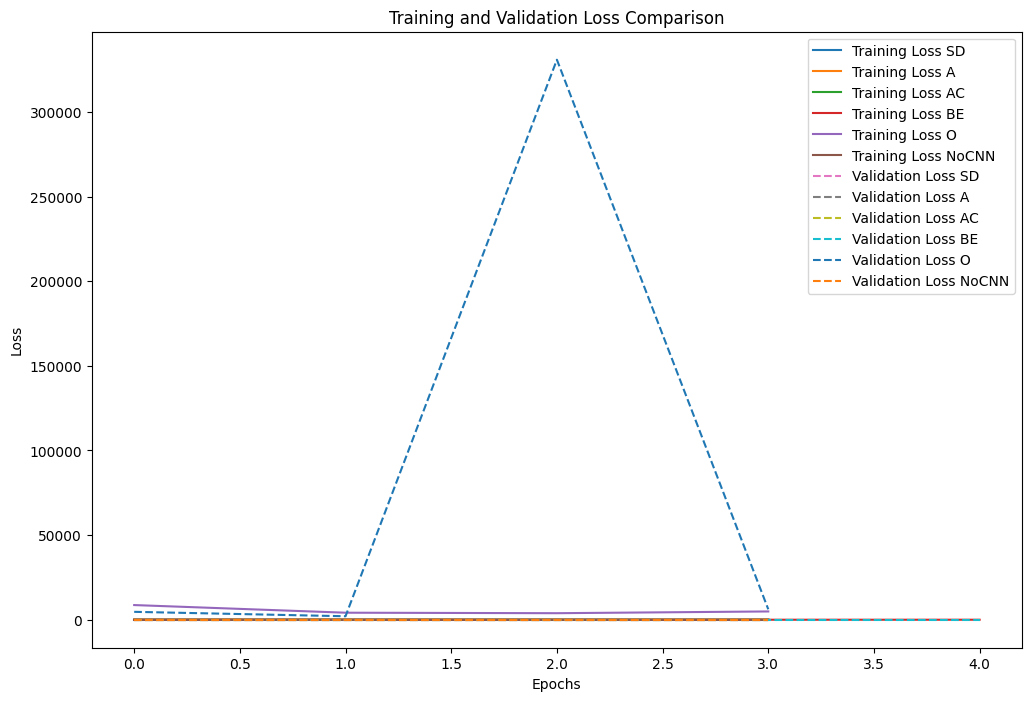

In [42]:

# Plot accuracies
plt.figure(figsize=(12, 8))

# Plot training accuracies
for history, label in zip([historySD, historyA, historyAC, historyBE, historyO, historyNoCNN],
                          ['SD', 'A', 'AC', 'BE', 'O', 'NoCNN']):
    plt.plot(history.history['accuracy'], label=f'Training Accuracy {label}')

# Plot validation accuracies
for history, label in zip([historySD, historyA, historyAC, historyBE, historyO, historyNoCNN],
                          ['SD', 'A', 'AC', 'BE', 'O', 'NoCNN']):
    plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy {label}', linestyle='dashed')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Comparison')
plt.show()

# Plot losses
plt.figure(figsize=(12, 8))

# Plot training losses
for history, label in zip([historySD, historyA, historyAC, historyBE, historyO, historyNoCNN],
                          ['SD', 'A', 'AC', 'BE', 'O', 'NoCNN']):
    plt.plot(history.history['loss'], label=f'Training Loss {label}')

# Plot validation losses
for history, label in zip([historySD, historyA, historyAC, historyBE, historyO, historyNoCNN],
                          ['SD', 'A', 'AC', 'BE', 'O', 'NoCNN']):
    plt.plot(history.history['val_loss'], label=f'Validation Loss {label}', linestyle='dashed')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Comparison')
plt.show()


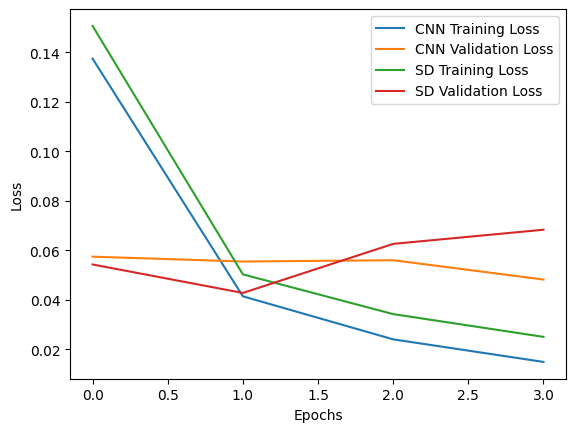

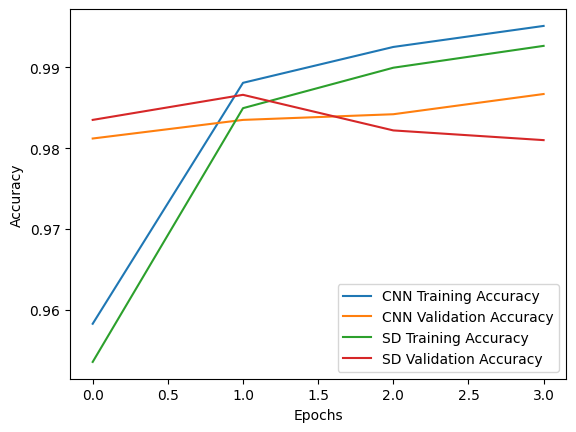

In [43]:
plt.plot(historyCNN.history['loss'], label='CNN Training Loss')
plt.plot(historyCNN.history['val_loss'], label='CNN Validation Loss')
plt.plot(historySD.history['loss'], label='SD Training Loss')
plt.plot(historySD.history['val_loss'], label='SD Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(historyCNN.history['accuracy'], label='CNN Training Accuracy')
plt.plot(historyCNN.history['val_accuracy'], label='CNN Validation Accuracy')
plt.plot(historySD.history['accuracy'], label='SD Training Accuracy')
plt.plot(historySD.history['val_accuracy'], label='SD Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


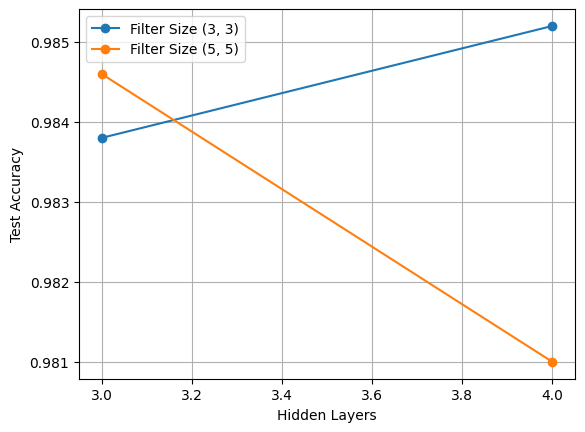

In [44]:
for filter_size, group_df in results_dfSD.groupby('Filter Size'):
    label = f"Filter Size {filter_size}"
    plt.plot(group_df['Hidden Layers'], group_df['Test Accuracy'], label=label, marker='o', linestyle='-')

plt.xlabel('Hidden Layers')
plt.ylabel('Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()


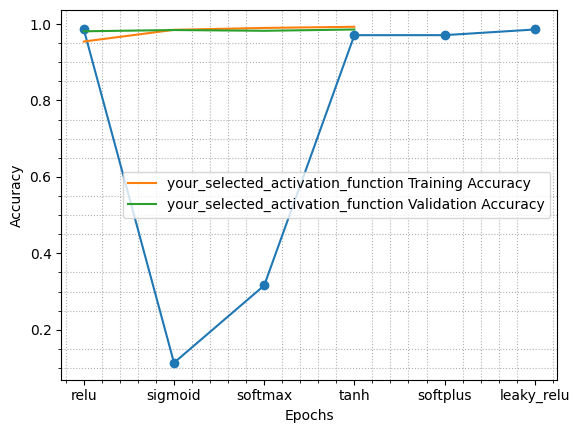

In [45]:
plt.plot(results_dfA['Activation Function'], results_dfA['Test Accuracy'], marker='o', linestyle='-')
plt.xlabel('Activation Function')
plt.ylabel('Test Accuracy')
plt.legend()
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':')

activation_function_to_plot = 'your_selected_activation_function'
plt.plot(historyA.history['accuracy'], label=f'{activation_function_to_plot} Training Accuracy')
plt.plot(historyA.history['val_accuracy'], label=f'{activation_function_to_plot} Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
<ipython-input-48-6684eeebeb5f>:47: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns_plot = sns.pointplot(data=results_dfAC, x='Network Size', y='Test Accuracy', hue='Activation Function', ci=None)


All models, dataframes, and graphs saved successfully.


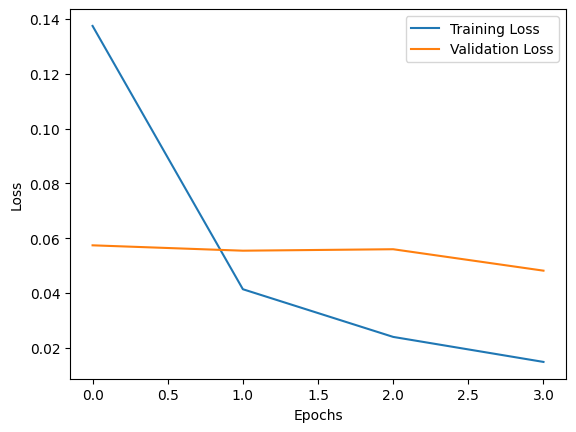

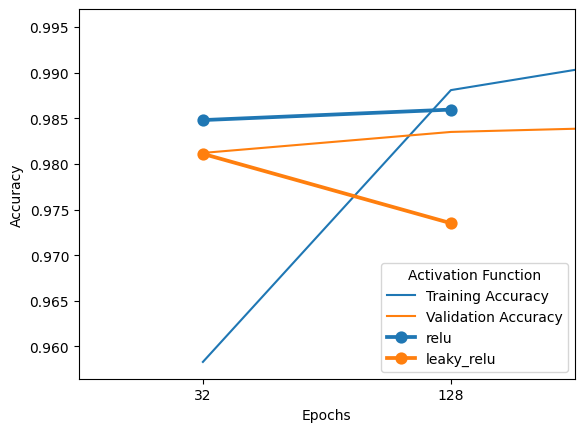

In [48]:
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Create a directory to save outputs
output_directory = 'saved_outputs'
os.makedirs(output_directory, exist_ok=True)

# Save models
modelCNN.save(os.path.join(output_directory, 'model_CNN.h5'))
modelSD.save(os.path.join(output_directory, 'model_SD.h5'))
modelA.save(os.path.join(output_directory, 'model_A.h5'))
modelAC.save(os.path.join(output_directory, 'model_AC.h5'))
modelBE.save(os.path.join(output_directory, 'model_BE.h5'))
# Add more model saves as needed

# Save dataframes
results_dfSD.to_csv(os.path.join(output_directory, 'results_dfSD.csv'), index=False)
results_dfA.to_csv(os.path.join(output_directory, 'results_dfA.csv'), index=False)
results_dfAC.to_csv(os.path.join(output_directory, 'results_dfAC.csv'), index=False)
results_dfO.to_csv(os.path.join(output_directory, 'results_dfO.csv'), index=False)
results_dfBE.to_csv(os.path.join(output_directory, 'results_dfBE.csv'), index=False)
results_dfNoCNN.to_csv(os.path.join(output_directory, 'results_dfNoCNN.csv'), index=False)
# Add more dataframe saves as needed

# Save graphs
plt.figure()
plt.plot(historyCNN.history['loss'], label='Training Loss')
plt.plot(historyCNN.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(os.path.join(output_directory, 'loss_graph_CNN.png'))

plt.figure()
plt.plot(historyCNN.history['accuracy'], label='Training Accuracy')
plt.plot(historyCNN.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(os.path.join(output_directory, 'accuracy_graph_CNN.png'))

# Add more graph saves as needed

# Save seaborn plots
sns_plot = sns.pointplot(data=results_dfAC, x='Network Size', y='Test Accuracy', hue='Activation Function', ci=None)
sns_plot.get_figure().savefig(os.path.join(output_directory, 'seaborn_plot.png'))



# Save other files or outputs as needed

print("All models, dataframes, and graphs saved successfully.")


In [49]:
!zip -r saved_outputs.zip saved_outputs


  adding: saved_outputs/ (stored 0%)
  adding: saved_outputs/your_code.py (stored 0%)
  adding: saved_outputs/loss_graph_CNN.png (deflated 12%)
  adding: saved_outputs/results_dfAC.csv (deflated 43%)
  adding: saved_outputs/model_SD.h5 (deflated 13%)
  adding: saved_outputs/model_CNN.h5 (deflated 8%)
  adding: saved_outputs/results_dfA.csv (deflated 24%)
  adding: saved_outputs/results_dfSD.csv (deflated 25%)
  adding: saved_outputs/seaborn_plot.png (deflated 10%)
  adding: saved_outputs/results_dfNoCNN.csv (deflated 39%)
  adding: saved_outputs/model_A.h5 (deflated 8%)
  adding: saved_outputs/accuracy_graph_CNN.png (deflated 12%)
  adding: saved_outputs/model_AC.h5 (deflated 8%)
  adding: saved_outputs/results_dfBE.csv (deflated 18%)
  adding: saved_outputs/model_BE.h5 (deflated 11%)
  adding: saved_outputs/results_dfO.csv (deflated 53%)


In [50]:
from google.colab import files
files.download('saved_outputs.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 6. Write a report on your observations on how the model performed with various experiments in step 5 and submit it along with the colab file.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=54a21652-0e9b-45ff-a672-e40722b5b96c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>